In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:

df = pd.read_csv("F:/Python DS/db/Mall_Customers.csv")


In [3]:
df

,CustomerID,Genre,Age,Annual_Income,Spendin_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [95]:

dum_df = pd.get_dummies(df)


In [96]:
dum_df = pd.get_dummies(df)

dum_df.head(15)

,CustomerID,Age,Annual_Income,Spendin_Score,Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,64,19,3,0,1
9,10,30,19,72,1,0


In [97]:
dum_df = dum_df.drop('Genre_Female', axis=1)
dum_df = dum_df.drop('CustomerID', axis=1)

In [98]:
dum_df

,Age,Annual_Income,Spendin_Score,Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [100]:

X = dum_df.iloc[:,0:3]
y = dum_df.iloc[:,3]

print(y.value_counts())
pd.crosstab(index=y,columns='Prop',normalize='all')


0    112
1     88
Name: Genre_Male, dtype: int64


col_0,Prop
Genre_Male,
0,0.56
1,0.44


In [101]:
X

,Age,Annual_Income,Spendin_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [102]:
y

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre_Male, Length: 200, dtype: uint8

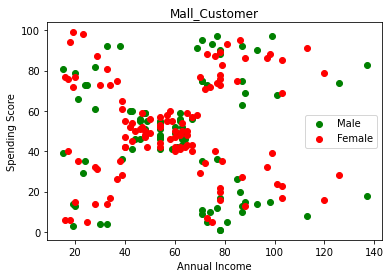

In [121]:

#### Visualizing the Data
import matplotlib.pyplot as plt
X_M = X[y==1]
X_F = X[y==0]
plt.scatter(X_B.Annual_Income,X_B.Spendin_Score,c="green",label="Male")
plt.scatter(X_NB.Annual_Income,X_NB.Spendin_Score,c="red",label="Female")
plt.legend()
plt.title("Mall_Customer")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [122]:
X_M


,Age,Annual_Income,Spendin_Score
0,19,15,39
1,21,15,81
8,64,19,3
10,67,19,14
14,37,20,13
...,...,...,...
187,28,101,68
192,33,113,8
197,32,126,74
198,32,137,18


In [123]:
X_F

,Age,Annual_Income,Spendin_Score
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
...,...,...,...
191,32,103,69
193,38,113,91
194,47,120,16
195,35,120,79


In [124]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)


In [125]:
print(X_train)

     Age  Annual_Income  Spendin_Score
0     19             15             39
45    24             39             65
82    67             54             41
7     23             18             94
35    21             33             81
..   ...            ...            ...
60    70             46             56
69    32             48             47
96    47             60             47
178   59             93             14
162   19             81              5

[140 rows x 3 columns]


In [126]:
print(X_train)

     Age  Annual_Income  Spendin_Score
0     19             15             39
45    24             39             65
82    67             54             41
7     23             18             94
35    21             33             81
..   ...            ...            ...
60    70             46             56
69    32             48             47
96    47             60             47
178   59             93             14
162   19             81              5

[140 rows x 3 columns]


In [127]:
X_test

,Age,Annual_Income,Spendin_Score
180,37,97,32
177,27,88,69
146,48,77,36
47,27,40,47
94,32,60,42
124,23,70,29
93,40,60,40
149,34,78,90
12,58,20,15
185,30,99,97


In [128]:
y_train

0      1
45     0
82     1
7      0
35     0
      ..
60     1
69     0
96     0
178    1
162    1
Name: Genre_Male, Length: 140, dtype: uint8

In [129]:
X_test

,Age,Annual_Income,Spendin_Score
180,37,97,32
177,27,88,69
146,48,77,36
47,27,40,47
94,32,60,42
124,23,70,29
93,40,60,40
149,34,78,90
12,58,20,15
185,30,99,97


# KNN model

In [139]:
                                                    
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))


[[22 12]
 [19  7]]


In [140]:

print(accuracy_score(y_test, y_pred))


0.48333333333333334


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        34
           1       0.37      0.27      0.31        26

    accuracy                           0.48        60
   macro avg       0.45      0.46      0.45        60
weighted avg       0.46      0.48      0.47        60



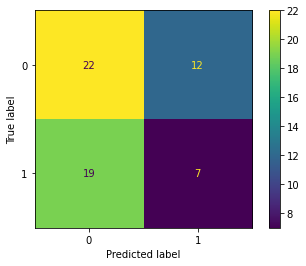

In [142]:

########## Supported from version 0.22 onwards ##########
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()



In [143]:

#########################################################
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)



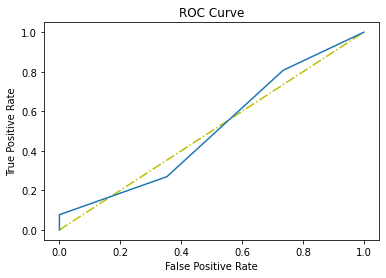

In [146]:
############ Plot ROC curve #############
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'y-.')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [147]:
#########################################
roc_auc_score(y_test, y_pred_prob)


0.5062217194570136